**Основные шаги:**
- Мутации накапливаются в обеих ветвях эволюции, поэтому скорость мутаций должна быть удвоена.
- Итоговая формула для расчета возраста:
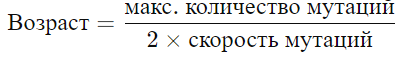


In [ ]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

In [10]:
!pip install biopython
!pip install ete3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273788 sha256=62888822a8d34fbc4ae63a6afcf40a940edc523e47645660a1def1b7706ec614
  Stored in directory: /root/.cache/pip/wheels/a0/72/00/1982bd848e52b03079dbf800900120bc1c20e92e9a1216e525
Successfully built ete3


In [9]:
from Bio import AlignIO

# Путь к файлу с выравниманием
alignment_file = "/content/aligned.fasta"

# Идентификатор митохондриальной Евы
reference_id = "FJ713601.1"

# Скорость мутаций (мутаций на год) для митохондриального генома (1 мутация на 3000 лет)
mutation_rate = 1 / 3000  # мутаций в год

# Загружаем выровненные последовательности
alignment = AlignIO.read(alignment_file, "fasta")

# Ищем последовательность митохондриальной Евы по ID
mitochondrial_eve = None
for record in alignment:
    if reference_id in record.id:  # Ищем нужный ID последовательности
        mitochondrial_eve = record
        break

if mitochondrial_eve is None:
    raise ValueError("Не удалось найти последовательность для митохондриальной Евы")

# Функция для подсчета точечных мутаций между 2мя последовательностями
def count_mutations(seq1, seq2):
    mutations = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i] and seq1[i] != "-" and seq2[i] != "-":
            mutations += 1
    return mutations

# Подсчет мутаций для каждой последовательности в сравнении с мит. Евой
mutations = []
for record in alignment:
    if record.id != mitochondrial_eve.id:  # Сравниваем по ID
        num_mutations = count_mutations(mitochondrial_eve.seq, record.seq)
        mutations.append((record.id, num_mutations))
        print(f"{record.id}: {num_mutations} мутаций")

# Находим максимальное количество мутаций и соответствующую последовательность
if mutations:  # Проверяем, есть ли мутации
    max_id, max_mutations = max(mutations, key=lambda x: x[1])
    print(f"Максимальное количество мутаций: {max_mutations} (последовательность {max_id})")

# Используем скорость мутаций для оценки возраста
# Возраст = (макс. количество мутаций) / (2 * скорость мутаций)
# Умножаем скорость на 2, так как мутации происходят по обеим ветвям эволюции
estimated_age = max_mutations / (2 * mutation_rate)
print(f"Оценочный возраст митохондриальной Евы: {estimated_age:.0f} лет")


JQ247408.1: 91 мутаций
KX459697.1: 81 мутаций
KP172434.1: 92 мутаций
JF499899.1: 81 мутаций
KP017255.1: 86 мутаций
JF811749.1: 83 мутаций
KP172432.1: 86 мутаций
JN084079.1: 85 мутаций
HQ259121.1: 86 мутаций
KU521454.1: 89 мутаций
KY934476.1: 80 мутаций
KY077676.1: 78 мутаций
KP340170.1: 81 мутаций
KY348642.1: 91 мутаций
GU590993.1: 85 мутаций
KY369152.2: 86 мутаций
HQ914447.1: 89 мутаций
KX440262.1: 96 мутаций
KX440275.1: 91 мутаций
KT698008.1: 89 мутаций
HQ189135.1: 86 мутаций
KR135883.1: 73 мутаций
KR135861.1: 94 мутаций
KT819263.1: 75 мутаций
KM986608.1: 79 мутаций
KM986625.1: 80 мутаций
KY686209.1: 83 мутаций
KM986616.1: 87 мутаций
JN084084.1: 84 мутаций
KY303770.1: 89 мутаций
KY686210.1: 85 мутаций
JF837819.1: 85 мутаций
KX440315.1: 91 мутаций
JN419195.1: 90 мутаций
KT698006.1: 93 мутаций
HM804485.1: 87 мутаций
JF343123.1: 80 мутаций
KY496869.1: 86 мутаций
KU508374.1: 83 мутаций
KY934478.1: 87 мутаций
HM453712.1: 78 мутаций
HM448049.1: 82 мутаций
KU521494.1: 81 мутаций
KU521491.1:

**Оценка времени разделения неандертальцев и денисовцев**

In [16]:
from Bio import AlignIO
from ete3 import Tree

# Пути к файлам
alignment_file = "/content/aligned.fasta"
tree_file = "/content/extended_alignment.fasta.treefile"
extended_alignment_file = "/content/extended_alignment.fasta"

# Чтение филогенетического дерева
tree = Tree(tree_file)

# Замена идентификаторов
neanderthal_seqs = ["KX198086.1", "KX198087.1"]
denisovan_seqs = ["KT780370.1", "FN673705.1", "FR695060.1"]

# Найдем минимальное расстояние между ветвями с неандертальцами и денисовцами
min_distance = float('inf')

# Проверяем существование узлов в дереве
for neanderthal in neanderthal_seqs:
    if neanderthal not in tree.get_leaf_names():
        print(f"Узел не найден: {neanderthal}")

for denisovan in denisovan_seqs:
    if denisovan not in tree.get_leaf_names():
        print(f"Узел не найден: {denisovan}")

# Если все узлы найдены, продолжаем
for neanderthal in neanderthal_seqs:
    for denisovan in denisovan_seqs:
        if neanderthal in tree.get_leaf_names() and denisovan in tree.get_leaf_names():
            distance = tree.get_distance(neanderthal, denisovan)
            if distance < min_distance:
                min_distance = distance

print(f"Эволюционное расстояние между неандертальцами и денисовцами: {min_distance}")

# Чтение выравнивания последовательностей
alignment = AlignIO.read(extended_alignment_file, "fasta")

# Достаем последовательности неандертальцев и денисовцев
sequences = {record.id: str(record.seq) for record in alignment}

# Выбираем первую последовательность неандертальца и денисовца
neanderthal_seq = sequences[neanderthal_seqs[0]]
denisovan_seq = sequences[denisovan_seqs[0]]

# Подсчет количества мутаций между последовательностями
def count_mutations(seq1, seq2):
    mutations = sum(1 for a, b in zip(seq1, seq2) if a != b and a != '-' and b != '-')
    return mutations

mutations = count_mutations(neanderthal_seq, denisovan_seq)
print(f"Количество мутаций между неандертальцем и денисовцем: {mutations}")

# Скорость мутаций (мутаций на год)
mutation_rate = 1 / 3000  # Например, 1 мутация на 3000 лет, как это делали с Евой

# Расчет времени разделения
# Возраст = (количество мутаций) / (2 * скорость мутаций)
estimated_age = mutations / (2 * mutation_rate)
print(f"Оцененное время разделения неандертальцев и денисовцев: {estimated_age:.0f} лет")


Эволюционное расстояние между неандертальцами и денисовцами: 0.027373280700000002
Количество мутаций между неандертальцем и денисовцем: 362
Оцененное время разделения неандертальцев и денисовцев: 543000 лет
